In [109]:
import json
import pandas as pd
import numpy as np
from pprint import pprint
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import matplotlib.pyplot as plt
import string
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.figure_factory as ff
from scipy.cluster import hierarchy
#stopwords = stopwords.words('english')

In [8]:
with open("./data/linux/linux_data_clean.txt", "r") as read_file:
    data = json.load(read_file)

In [9]:
def create_pairwise_similarity(data):
    corpus, columns = [], [] 
    for d in range(len(data['commands'])):
        corpus.append(data['commands'][d]['description'])
    vect = TfidfVectorizer(min_df=1, stop_words="english" ) #, stop_words="english"                                                                                                                                                                                                  
    tfidf = vect.fit_transform(corpus)                                                                                                                                                                                                                       
    pairwise_similarity = tfidf * tfidf.T 
    pair_sim = pairwise_similarity.toarray()
    for d in range(len(data['commands'])):
        columns.append(data['commands'][d]['commands'])
    sim_df = pd.DataFrame(pair_sim, columns=columns, index=columns)
    return sim_df

In [10]:
new_data = {}
new_data['commands']=[]
for i in range(len(data['commands'])):
    cmd_name = data['commands'][i]['commands']
    cmd_desc = data['commands'][i]['description']
    
    pars = data['commands'][i]['parameters']
    for k, v in pars.items():
        if v!='None':
            cmd_desc+=v
    new_data['commands'].append({
        'commands': cmd_name,
        'description':cmd_desc})

In [24]:
sim_df_desc_pars = create_pairwise_similarity(new_data)

In [25]:
sim_df_desc_pars.to_csv('./data/linux/linux_desc_pars_sim_df.csv')

In [110]:
sim_df_desc_pars = pd.read_csv('./data/linux/linux_desc_pars_sim_df.csv', index_col=0)

In [111]:
sim_df_desc_pars

ac  addftinfo  addr2line  afmtodit   apropos        ar  \
ac         1.000000   0.008939   0.039069  0.025526  0.045145  0.039624   
addftinfo  0.008939   1.000000   0.023186  0.441853  0.018677  0.015297   
addr2line  0.039069   0.023186   1.000000  0.051611  0.061747  0.076967   
afmtodit   0.025526   0.441853   0.051611  1.000000  0.033222  0.025974   
apropos    0.045145   0.018677   0.061747  0.033222  1.000000  0.024352   
...             ...        ...        ...       ...       ...       ...   
yum        0.045581   0.009113   0.067528  0.030608  0.043995  0.048090   
yumdb      0.012070   0.001100   0.014377  0.006309  0.015634  0.010571   
zdump      0.078361   0.002720   0.028105  0.008822  0.014755  0.018665   
zic        0.070640   0.017191   0.066731  0.027829  0.020866  0.041436   
zramctl    0.014342   0.004746   0.037351  0.016513  0.028132  0.018005   

               arch  aria_chk  aria_dump_log  aria_pack  ...  yum-copr  \
ac         0.060860  0.067952       0.064394   0.034724  ...  0.007688   
addftinfo  0.000000  0.020094       0.021550   0.011461  ...  0.000000   
addr2line  0.027363  0.078172       0.087518   0.050895  ...  0.000679   
afmtodit   0.000000  0.062655       0.053467   0.051674  ...  0.002691   
apropos    0.020959  0.051223       0.085068   0.029566  ...  0.005982   
...             ...       ...            ...        ...  ...       ...   
yum        0.027740  0.087528       0.058691   0.036352  ...  0.070516   
yumdb      0.007282  0.052518       0.011761   0.034364  ...  0.030431   
zdump      0.000000  0.025665       0.018881   0.014581  ...  0.001361   
zic        0.000000  0.092734       0.053111   0.038481  ...  0.004974   
zramctl    0.007500  0.045479       0.043056   0.017105  ...  0.000000   

           yum-cron  yum-plugin-copr  yum-shell  yum-updatesd       yum  \
ac         0.032707         0.032707   0.045576      0.005494  0.045581   
addftinfo  0.020710         0.020710   0.009112      0.003415  0.009113   
addr2line  0.067987         0.067987   0.067520      0.009918  0.067528   
afmtodit   0.044436         0.044436   0.030605      0.010278  0.030608   
apropos    0.047198         0.047198   0.044400      0.004469  0.043995   
...             ...              ...        ...           ...       ...   
yum        0.143536         0.143536   0.999961      0.051572  1.000000   
yumdb      0.029999         0.029999   0.101610      0.016314  0.101622   
zdump      0.016621         0.016621   0.021556      0.000000  0.021558   
zic        0.034400         0.034400   0.036856      0.004563  0.036860   
zramctl    0.015418         0.015418   0.024596      0.001957  0.024599   

              yumdb     zdump       zic   zramctl  
ac         0.012070  0.078361  0.070640  0.014342  
addftinfo  0.001100  0.002720  0.017191  0.004746  
addr2line  0.014377  0.028105  0.066731  0.037351  
afmtodit   0.006309  0.008822  0.027829  0.016513  
apropos    0.015634  0.014755  0.020866  0.028132  
...             ...       ...       ...       ...  
yum        0.101622  0.021558  0.036860  0.024599  
yumdb      1.000000  0.014391  0.029247  0.018987  
zdump      0.014391  1.000000  0.277296  0.011984  
zic        0.029247  0.277296  1.000000  0.032303  
zramctl    0.018987  0.011984  0.032303  1.000000  

[2247 rows x 2247 columns]

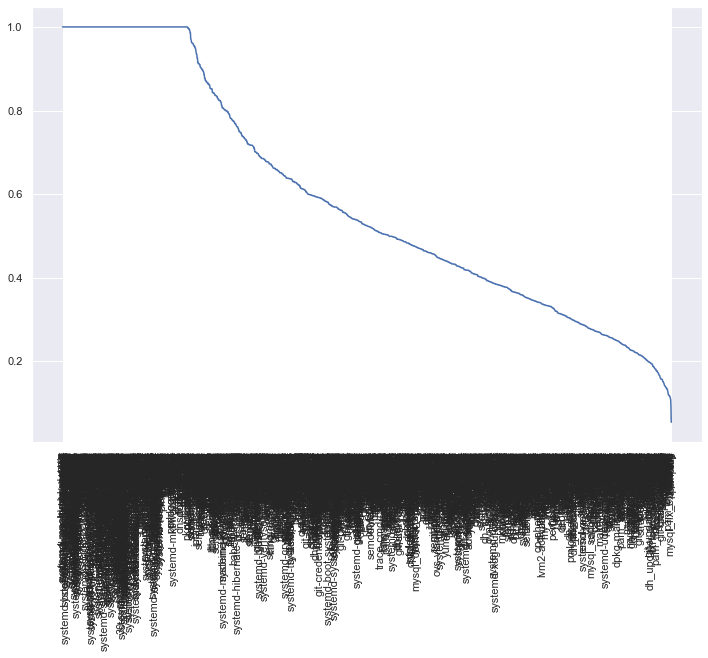

In [112]:
id_ar = np.identity((len(sim_df_desc_pars.columns)))
sim_df_desc_pars[sim_df_desc_pars == -0]= 0
temp = sim_df_desc_pars.round(3) - id_ar
temp[temp < 0] = 0
temp2 = temp[temp.idxmax()]
a = temp.max()
b = temp.idxmax()
c = dict(a)
d = dict(b)
sim_sc = []
for k, v in c.items():
    sim_sc.append([k, d[k], c[k]] )
sim_sc_pd = pd.DataFrame(sim_sc, columns=['first', 'second', 'score'])
asc = sim_sc_pd.sort_values('score', ascending=False)
figure = plt.figure(figsize=(12, 8))
plt.plot(asc['first'], asc['score'])
plt.xticks(rotation=90);
plt.savefig('./results/linux/linux_desc_pars_combined_max_sim_per_command.png');

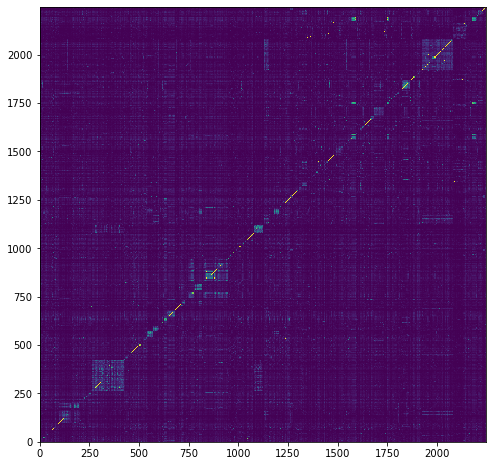

In [5]:
figure = plt.figure(figsize=(8,8))
plt.pcolor(sim_df_desc_pars);
#plt.savefig('./results/linux/linux_desc_pars_overall.png');

In [113]:
def find_cmds_with_high_sim(sim_df, lower_threshold, upper_threshold):
    cols = list(sim_df.columns)
    simi = dict()
    for c in cols:
        vv = sim_df[(sim_df[c]>=lower_threshold)  & (sim_df[c]<upper_threshold)][[c]].index.values
        simi[c] = []
        for v in vv:  
            if v!=c and v not in simi.keys():  
                simi[c].append(v)
    return simi

In [114]:
def create_high_sim_cmds_df(sim_df, new_sim):
    data_items = new_sim.items()
    data_list = list(data_items)
    df = pd.DataFrame(data_list, columns=['comm1', 'comm2'])
    lst_col = 'comm2'
    r = pd.DataFrame({
      col:np.repeat(df[col].values, df[lst_col].str.len())
      for col in df.columns.drop(lst_col)}
     ).assign(**{lst_col:np.concatenate(df[lst_col].values)})[df.columns]
    r['sim_score'] = ''
    for i in range(len(r['comm1'])):
        first_comm = r.loc[i][0]
        second_comm = r.loc[i][1]
        sim_val = sim_df.loc[[first_comm]][second_comm][0]
        r.loc[i][2] =  round(sim_val,5)
    cols = np.unique(r['comm1'].values)
    indx = np.unique(r['comm2'].values)
    new_df = pd.DataFrame(columns=cols, index=indx)
    new_df = new_df.loc[:,~new_df.columns.duplicated()]
    new_df = new_df.loc[~new_df.index.duplicated(keep='first')]
    new_cols = new_df.columns
    new_indx = new_df.index
    for col in new_cols:
        for indx in new_indx:
            val = round(sim_df.loc[[col]][indx][0],5)
            new_df.loc[indx, col] = val
    return new_df , r

In [115]:
def plot_high_sim_cmds(new_df, limit):
    list_val = new_df.to_numpy('float').tolist()
    fig, ax = plt.subplots(1,1)
    fig.set_figheight(20)
    fig.set_figwidth(20)
    im = ax.imshow(list_val)
    x_axis_val = list(new_df.columns.values)
    y_axis_val = list(new_df.index.values)
    # We want to show all ticks...
    ax.set_xticks(np.arange(len(x_axis_val)))
    ax.set_yticks(np.arange(len(y_axis_val)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(x_axis_val)
    ax.set_yticklabels(y_axis_val)
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")
    plt.setp(ax.get_yticklabels(),rotation=0, ha="right",
         rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    ax.set_title("")
    if limit==0.99:
        plt.savefig('./results/linux/linux_desc_pars_combined_less_than_1.png')
    elif limit==1.0:
        plt.savefig('./results/linux/linux_desc_pars_combined_equal_1.png')
        
    plt.show()

In [9]:
simi_less_than_1 = find_cmds_with_high_sim(sim_df_desc_pars, 0.75, 0.99)
new_sim_less_than_1 = {k: v for k, v in simi_less_than_1.items() if len(simi_less_than_1[k])>0}
len(new_sim_less_than_1)

133

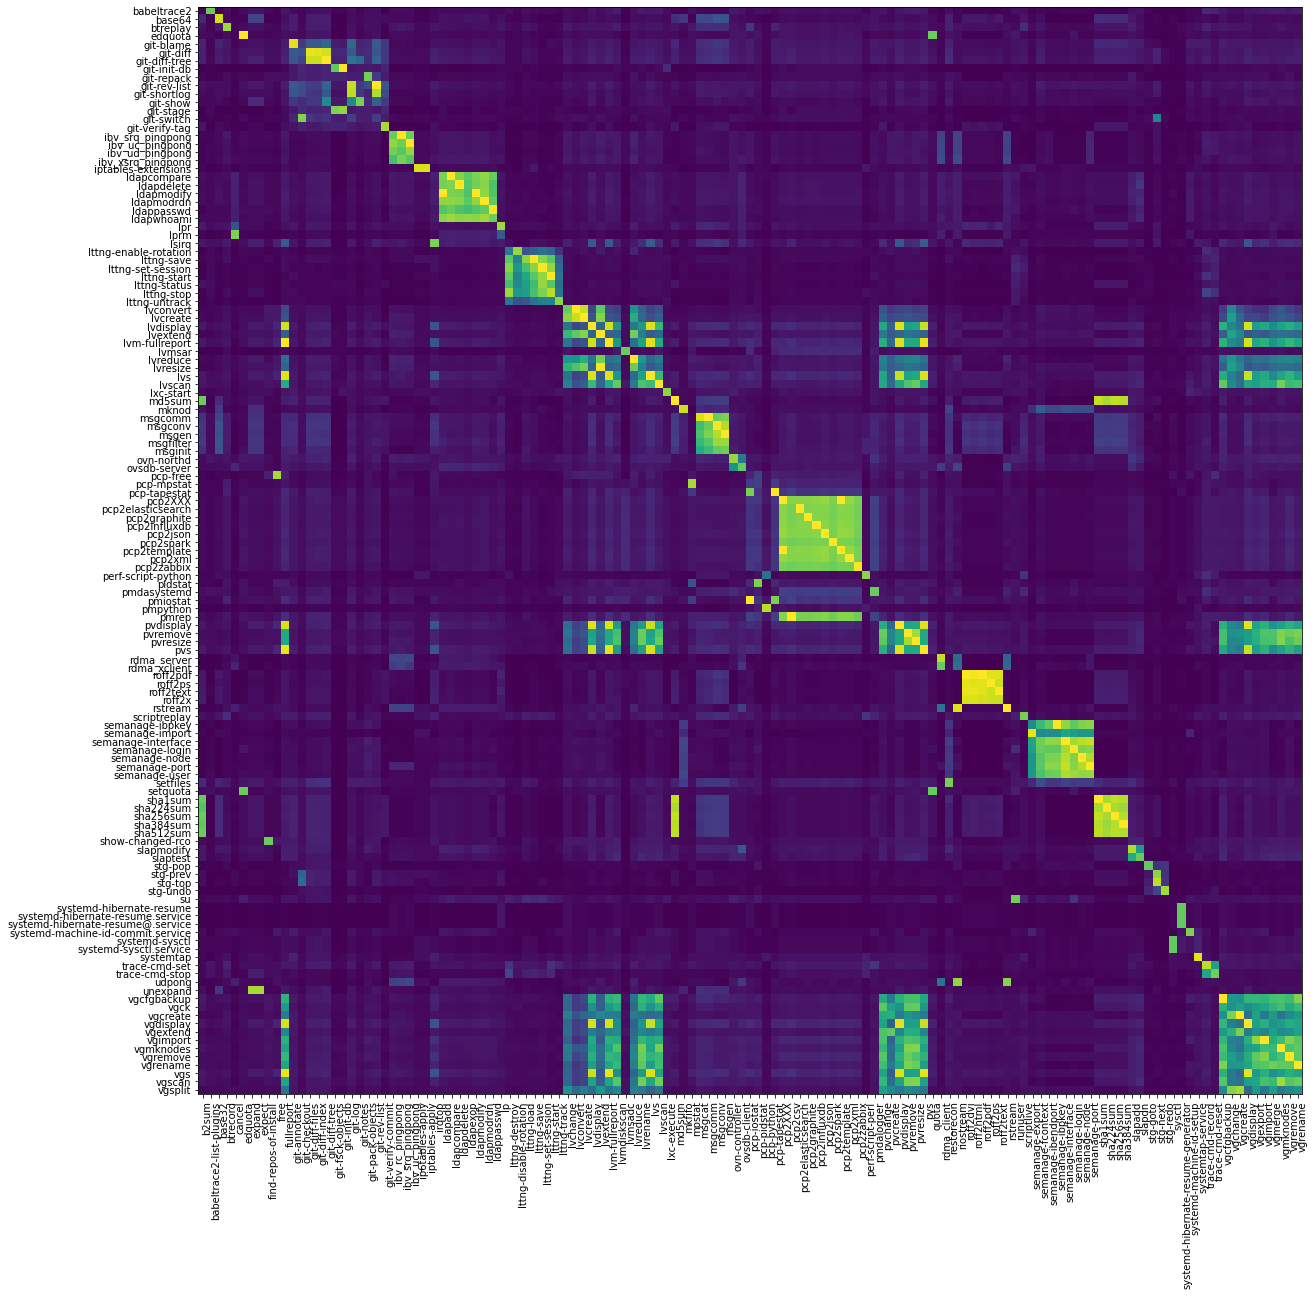

In [10]:
new_df_less_than_1, df_less_than_1_comd1_comd2 = create_high_sim_cmds_df(sim_df_desc_pars, new_sim_less_than_1)
plot_high_sim_cmds(new_df_less_than_1, 0.99)

In [11]:
simi_equal_1 = find_cmds_with_high_sim(sim_df_desc_pars, 0.99, 1.09)
new_sim_equal_1 = {k: v for k, v in simi_equal_1.items() if len(simi_equal_1[k])>0}
len(new_sim_equal_1)

272

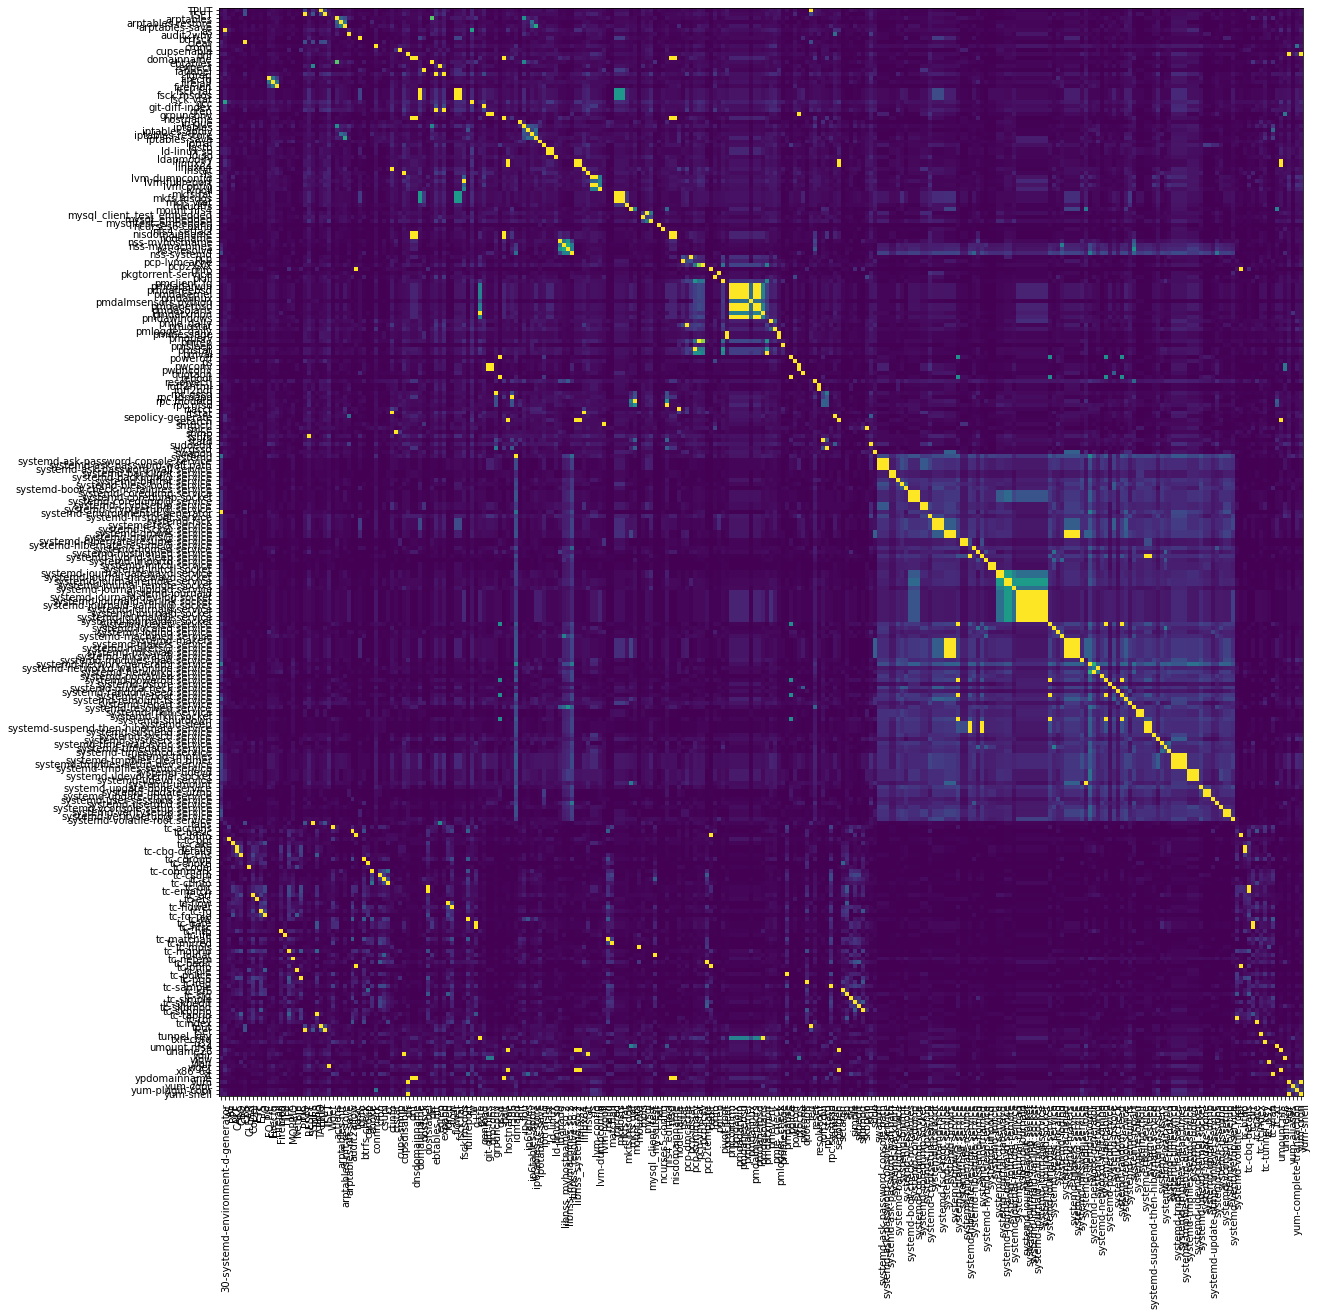

In [12]:
new_df_equal_1, df_equal_1_comd1_comd2 = create_high_sim_cmds_df(sim_df_desc_pars, new_sim_equal_1)
plot_high_sim_cmds(new_df_equal_1, 1.0)

In [13]:
comm1_unique = list((df_less_than_1_comd1_comd2['comm1'].unique()))
comm2_unique = list((df_less_than_1_comd1_comd2['comm2'].unique()))
for cmd in comm2_unique:
    if cmd not in comm1_unique:
        comm1_unique.append(cmd)
new = sim_df_desc_pars.loc[comm1_unique]

In [14]:
fig = ff.create_dendrogram(new,  labels=new.index)
fig.update_layout(width=1600, height=800)
fig.write_image('./results/linux/linux_desc_pars_combined_dendo_sim_less_than_1.png')
fig.show()

In [15]:
comm1_unique = list((df_equal_1_comd1_comd2['comm1'].unique()))
comm2_unique = list((df_equal_1_comd1_comd2['comm2'].unique()))
for cmd in comm2_unique:
    if cmd not in comm1_unique:
        comm1_unique.append(cmd)
new = sim_df_desc_pars.loc[comm1_unique]

In [16]:
fig = ff.create_dendrogram(new,  labels=new.index)
fig.update_layout(width=1600, height=800)
fig.write_image('./results/linux/linux_desc_pars_combined_dendo_sim_equal_1.png')
fig.show()

In [116]:
def cal_histo(new_sim):
    G = nx.Graph()
    for key, value in new_sim.items():
        for v in value:
            G.add_edge(key,v)
    subgraphs =  list(nx.connected_components(G))
    new = dict()
    for i in range(len(subgraphs)):
        new[next(iter(subgraphs[i]))] = len(subgraphs[i])
    new = {k: v for k, v in sorted(new.items(), key=lambda item: item[1],reverse=True)} 
    return subgraphs, new
           

In [117]:
simi_overall = find_cmds_with_high_sim(sim_df_desc_pars, 0.75, 1.09)
new_sim = {k: v for k, v in simi_overall.items() if len(simi_overall[k])>0}
len(new_sim)

396

In [118]:
subgraphs, new = cal_histo(new_sim)

In [119]:
subgraphs

[{'AS', 'as'},
 {'audit2allow', 'audit2why'},
 {'b2sum',
  'md5sum',
  'sha1sum',
  'sha224sum',
  'sha256sum',
  'sha384sum',
  'sha512sum'},
 {'babeltrace2', 'babeltrace2-list-plugins'},
 {'base32', 'base64'},
 {'cancel', 'lprm'},
 {'CLEAR', 'clear'},
 {'dir', 'ls', 'vdir'},
 {'dnsdomainname',
  'domainname',
  'hostname',
  'nisdomainname',
  'nodename',
  'ypdomainname'},
 {'egrep', 'fgrep', 'grep'},
 {'expand', 'expect', 'unexpand'},
 {'find-repos-of-install', 'show-changed-rco'},
 {'Firecfg', 'firecfg'},
 {'Firejail', 'firejail'},
 {'Firemon', 'firemon'},
 {'free', 'pcp-free'},
 {'g++', 'gcc'},
 {'genload', 'pmdatxmon', 'txrecord'},
 {'git-annotate', 'git-blame'},
 {'git-checkout', 'git-switch'},
 {'git-diff', 'git-diff-files', 'git-diff-index', 'git-diff-tree'},
 {'git-fsck-objects', 'git-init-db', 'git-stage'},
 {'git-log', 'git-rev-list', 'git-shortlog'},
 {'git-notes', 'git-show'},
 {'git-pack-objects', 'git-repack'},
 {'git-verify-commit', 'git-verify-tag'},
 {'ibv_rc_pingpo

In [120]:
new

{'vgscan': 15,
 'pcp2zabbix': 11,
 'systemd-journald': 9,
 'ldapcompare': 8,
 'pmdaaix': 8,
 'vgs': 8,
 'semanage-fcontext': 8,
 'systemd-mkswap.service': 8,
 'sha256sum': 7,
 'lttng-set-session': 7,
 'nodename': 6,
 'msginit': 6,
 'roff2x': 6,
 'linux32': 6,
 'lvconvert': 6,
 'ibv_rc_pingpong': 5,
 'vgextend': 5,
 'systemd-kexec.service': 5,
 'systemd-hybrid-sleep.service': 5,
 'systemd-tmpfiles-clean.timer': 5,
 'git-diff-tree': 4,
 'yum': 4,
 'bfifo': 4,
 'dosfsck': 4,
 'pwunconv': 4,
 'mkfs.vfat': 4,
 'systemd-ask-password-console.service': 4,
 'systemd-coredump.service': 4,
 'systemd-fsck': 4,
 'systemd-hibernate-resume-generator': 4,
 'systemd-udevd-kernel.socket': 4,
 'ls': 3,
 'egrep': 3,
 'expect': 3,
 'genload': 3,
 'git-stage': 3,
 'git-shortlog': 3,
 'pcp-tapestat': 3,
 'pmquery': 3,
 'edquota': 3,
 'rdma_xclient': 3,
 'tset': 3,
 'TPUT': 3,
 'riostream': 3,
 'stg-prev': 3,
 'tc-cbq-details': 3,
 'lnstat': 3,
 'tc-drr': 3,
 'gate': 3,
 'poweroff': 3,
 'iptables-apply': 3,
 

In [121]:
new['vg*, pv*, lv*'] = new.pop('vgscan')
new['pcp*'] = new.pop('pcp2zabbix')
new['systemd-journald*'] = new.pop('systemd-journald')
new['lda*'] = new.pop('ldapcompare')
new['pmda*'] = new.pop('pmdaaix')
new['semanage*'] = new.pop('semanage-fcontext')
new['systemd-growfs/makefs'] = new.pop('systemd-mkswap.service')
new['lttng-*'] = new.pop('lttng-set-session')
new['domainname, hostname'] = new.pop('nodename')
new['roff2*'] = new.pop('roff2x')
new['systemd-kexec*'] = new.pop('systemd-kexec.service')
new['systemd-hybrid*'] = new.pop('systemd-hybrid-sleep.service')
new['systemd-tmpfiles*'] = new.pop('systemd-tmpfiles-clean.timer')
new['systemd-ask*'] = new.pop('systemd-ask-password-console.service')
new['systemd-coredump*'] = new.pop('systemd-coredump.service')
new['systemd-hibernate/sleep'] = new.pop('systemd-hibernate-resume-generator')
new['systemd-udevd-*'] = new.pop('systemd-udevd-kernel.socket')
new['systemd-cryptsetup*'] = new.pop('systemd-cryptsetup@.service')
new['systemd-initctl*'] = new.pop('systemd-initctl.service')
new['systemd-journal-gatewayd*'] = new.pop('systemd-journal-gatewayd.service')
new['systemd-journal-remote*'] = new.pop('systemd-journal-remote.service')
new['systemd-update-*'] = new.pop('systemd-update-utmp-runlevel.service')
new['systemd-veritysetup*'] = new.pop('systemd-veritysetup.service')


new

{'vgs': 8,
 'sha256sum': 7,
 'msginit': 6,
 'linux32': 6,
 'lvconvert': 6,
 'ibv_rc_pingpong': 5,
 'vgextend': 5,
 'git-diff-tree': 4,
 'yum': 4,
 'bfifo': 4,
 'dosfsck': 4,
 'pwunconv': 4,
 'mkfs.vfat': 4,
 'systemd-fsck': 4,
 'ls': 3,
 'egrep': 3,
 'expect': 3,
 'genload': 3,
 'git-stage': 3,
 'git-shortlog': 3,
 'pcp-tapestat': 3,
 'pmquery': 3,
 'edquota': 3,
 'rdma_xclient': 3,
 'tset': 3,
 'TPUT': 3,
 'riostream': 3,
 'stg-prev': 3,
 'tc-cbq-details': 3,
 'lnstat': 3,
 'tc-drr': 3,
 'gate': 3,
 'poweroff': 3,
 'iptables-apply': 3,
 'ld.so': 3,
 'lvm-dumpconfig': 3,
 'systemd-sysctl': 3,
 'systemd-backlight': 3,
 'systemd-rfkill': 3,
 'as': 2,
 'audit2allow': 2,
 'babeltrace2': 2,
 'base64': 2,
 'cancel': 2,
 'clear': 2,
 'show-changed-rco': 2,
 'firecfg': 2,
 'Firejail': 2,
 'Firemon': 2,
 'pcp-free': 2,
 'g++': 2,
 'git-annotate': 2,
 'git-checkout': 2,
 'git-show': 2,
 'git-repack': 2,
 'git-verify-tag': 2,
 'init': 2,
 'irqtop': 2,
 'last': 2,
 'lp': 2,
 'lttng-enable-rotation

In [122]:
new = {k: v for k, v in sorted(new.items(), key=lambda item: item[1],reverse=True)} 
new = {key:val for key, val in new.items() if val >3}
new

{'vg*, pv*, lv*': 15,
 'pcp*': 11,
 'systemd-journald*': 9,
 'vgs': 8,
 'lda*': 8,
 'pmda*': 8,
 'semanage*': 8,
 'systemd-growfs/makefs': 8,
 'sha256sum': 7,
 'lttng-*': 7,
 'msginit': 6,
 'linux32': 6,
 'lvconvert': 6,
 'domainname, hostname': 6,
 'roff2*': 6,
 'ibv_rc_pingpong': 5,
 'vgextend': 5,
 'systemd-kexec*': 5,
 'systemd-hybrid*': 5,
 'systemd-tmpfiles*': 5,
 'git-diff-tree': 4,
 'yum': 4,
 'bfifo': 4,
 'dosfsck': 4,
 'pwunconv': 4,
 'mkfs.vfat': 4,
 'systemd-fsck': 4,
 'systemd-ask*': 4,
 'systemd-coredump*': 4,
 'systemd-hibernate/sleep': 4,
 'systemd-udevd-*': 4}

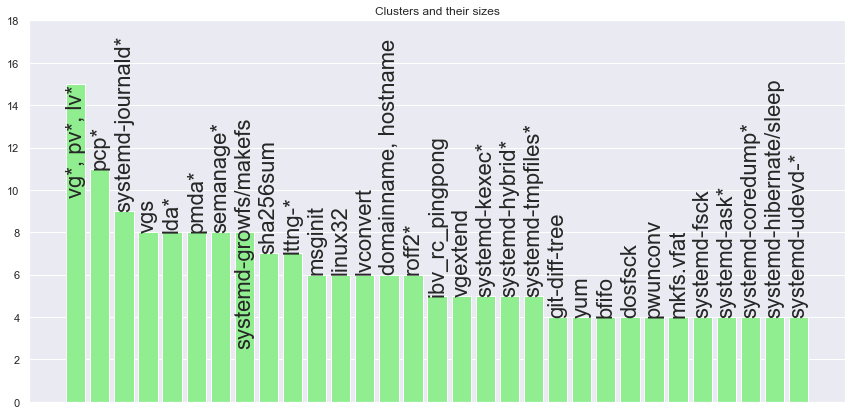

In [131]:
import seaborn as sns
sns.set()
fig= plt.figure(figsize=(12,6))
x = list(new.keys())
y = list(new.values())
plt.bar(x, y,  color='lightgreen')
plt.xticks()
labels = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
plt.yticks(labels, rotation='horizontal')
plt.title('Clusters and their sizes')
for i in range(len(x)):
    if i==0:
        plt.annotate(str(x[i]), xy=(x[i],y[i]), ha='center', va='top', rotation=90, fontsize=22)
    elif i==7:
        plt.annotate(str(x[i]), xy=(x[i],y[i]), ha='center', va='center', rotation=90, fontsize=22)
    else:
        plt.annotate(str(x[i]), xy=(x[i],y[i]), ha='center', va='bottom', rotation=90, fontsize=22)

plt.xticks([])
plt.tight_layout()
plt.savefig('./results/linux/linux_desc_pars_combined_histo.png')
plt.show()